In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Function to one-hot encode labels

In [2]:
def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=6)
    return image, label

# Data Preprocessing

### Training image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\srsin\Downloads\Compressed\archive_2\RiceLeafsDisease\train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

training_set = training_set.map(one_hot_encode)

Found 2100 files belonging to 6 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\srsin\Downloads\Compressed\archive_2\RiceLeafsDisease\validation",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

validation_set = validation_set.map(one_hot_encode)

Found 528 files belonging to 6 classes.


In [5]:
training_set

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   ...
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]]

  [[255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   ...
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]]

  [[255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   ...
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]]

  ...

  [[255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   ...
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]]

  [[255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   ...
   [255.     255.     255.    ]
   [255.     255.     255.    ]
   [255.   

# Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [8]:
model = Sequential()

#### building convulation layer

In [9]:
model.add(Conv2D(filters = 32, kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters = 32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\srsin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.add(Conv2D(filters = 64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 64, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters = 128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters = 256, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters = 256, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
#model.add(Conv2D(filters = 512, kernel_size=3,padding='same',activation='relu'))
#model.add(Conv2D(filters = 512, kernel_size=3,activation='relu'))
#model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
#model.add(Dropout(0.25))

In [15]:
model.add(Flatten())
model.add(Dropout(0.2))

In [16]:
model.add(Dense(units=256,activation='relu',kernel_regularizer=regularizers.l2(0.01)))

In [17]:
#model.add(Dropout(0.4))

#### output layer

In [18]:
model.add(Dense(units=6,activation='softmax'))

### Compiling Model

In [19]:
model.compile(Adam(learning_rate = 1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,533,350 (13.48 MB)

 Trainable params: 3,533,350 (13.48 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 581ms/step - accuracy: 0.2228 - loss: 8.4058 - val_accuracy: 0.4867 - val_loss: 6.1325
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 515ms/step - accuracy: 0.4032 - loss: 6.3358 - val_accuracy: 0.6117 - val_loss: 5.7781
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 517ms/step - accuracy: 0.5648 - loss: 5.8610 - val_accuracy: 0.6212 - val_loss: 5.5894
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 520ms/step - accuracy: 0.6416 - loss: 5.5845 - val_accuracy: 0.6402 - val_loss: 5.4589
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 518ms/step - accuracy: 0.6877 - loss: 5.3988 - val_accuracy: 0.6970 - val_loss: 5.2588
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 531ms/step - accuracy: 0.7226 - loss: 5.1848 - val_accuracy: 0.7064 - val_loss: 5.1458
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 37s 555ms/step - accuracy: 0.7305 - loss: 5.0697 - val_accuracy: 0.7500 - val_loss: 5.0150
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 36s 539ms/step - accuracy: 0.7683 - loss: 4.9397 - val_accu

# Model Evaluation

#### on training set

In [22]:
train_loss,train_acc = model.evaluate(training_set)

66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.9988 - loss: 2.8666


In [23]:
print(train_loss,train_acc)

2.860659599304199 0.9995238184928894


#### on validation set

In [24]:
val_loss,val_acc = model.evaluate(validation_set)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9008 - loss: 3.1246


In [25]:
print(val_loss,val_acc)

3.187472105026245 0.8825757503509521


# Saving Model

In [26]:
model.save("trained_model.h5")

In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.2666666805744171,
  0.45523810386657715,
  0.584761917591095,
  0.653333306312561,
  0.6947619318962097,
  0.7257142663002014,
  0.7338095307350159,
  0.772857129573822,
  0.7842857241630554,
  0.7866666913032532,
  0.7980952262878418,
  0.8361904621124268,
  0.8361904621124268,
  0.842380940914154,
  0.8585714101791382,
  0.8628571629524231,
  0.8647618889808655,
  0.8885714411735535,
  0.8909524083137512,
  0.8995237946510315,
  0.8938094973564148,
  0.9052380919456482,
  0.9233333468437195,
  0.9319047331809998,
  0.9314285516738892,
  0.9333333373069763,
  0.9371428489685059,
  0.9461904764175415,
  0.9433333277702332,
  0.95333331823349,
  0.9552381038665771,
  0.9547619223594666,
  0.9538094997406006,
  0.9666666388511658,
  0.9719047546386719,
  0.9723809361457825,
  0.9704762101173401,
  0.9676190614700317,
  0.9790475964546204,
  0.9804762005805969,
  0.9800000190734863,
  0.9838095307350159,
  0.9838095307350159,
  0.9847618937492371,
  0.9900000095367432,
  0

##### recording history

In [29]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

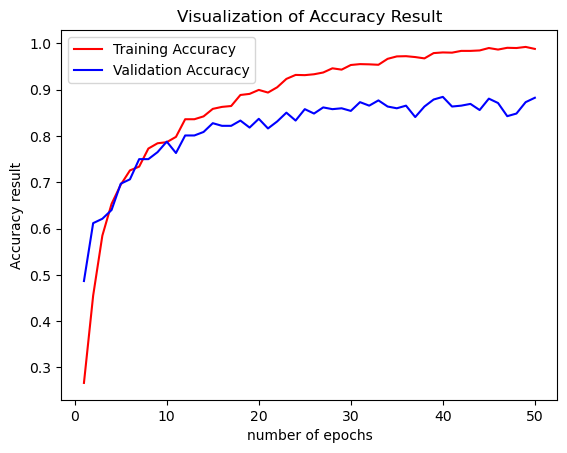

In [30]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red', label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'blue', label = 'Validation Accuracy')
plt.xlabel('number of epochs')
plt.ylabel('Accuracy result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Other Metrics of Accuracy

In [31]:
class_names = ['narrow_brown_spot','bacterial_leaf_blight','brown_spot','healthy','leaf_blast','leaf_scald']
class_names

['narrow_brown_spot',
 'bacterial_leaf_blight',
 'brown_spot',
 'healthy',
 'leaf_blast',
 'leaf_scald']

In [32]:
test_set = validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\srsin\Downloads\Compressed\archive_2\RiceLeafsDisease\validation",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

validation_set = validation_set.map(one_hot_encode)

Found 528 files belonging to 6 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step


(array([[9.99944568e-01, 5.85700263e-06, 4.54806127e-07, 4.90446619e-05,
         8.72402761e-10, 5.15793586e-09],
        [6.41217232e-01, 3.53024960e-01, 2.98224245e-06, 5.38872508e-03,
         3.51115682e-06, 3.62553139e-04],
        [9.99971509e-01, 1.36601102e-05, 1.02742890e-08, 1.47332703e-05,
         3.96940841e-10, 1.55339762e-07],
        ...,
        [2.45695588e-07, 1.09827615e-05, 3.43906066e-07, 4.95516497e-06,
         1.50375524e-06, 9.99981880e-01],
        [1.79341048e-04, 1.29466003e-03, 4.73231217e-03, 1.42137974e-03,
         3.51890619e-03, 9.88853335e-01],
        [1.17346253e-02, 7.45445536e-03, 1.31821180e-05, 7.13058412e-02,
         5.50590403e-06, 9.09486413e-01]], dtype=float32),
 (528, 6))

In [34]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(528,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 2, 3, 3, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 5, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 1, 3, 2, 5, 3, 2, 3, 3, 3, 3, 2, 3,
     

In [35]:
y_true = tf.concat([y for x,y in test_set],axis=0)
y_true

<tf.Tensor: shape=(528,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

# Precision and Recall

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_true,predicted_categories,target_names=class_names))

                       precision    recall  f1-score   support

    narrow_brown_spot       0.95      0.95      0.95        88
bacterial_leaf_blight       0.88      0.84      0.86        88
           brown_spot       0.91      0.80      0.85        88
              healthy       0.71      0.80      0.75        88
           leaf_blast       0.99      0.94      0.97        88
           leaf_scald       0.88      0.97      0.92        88

             accuracy                           0.88       528
            macro avg       0.89      0.88      0.88       528
         weighted avg       0.89      0.88      0.88       528



# Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[84,  0,  0,  1,  0,  3],
       [ 1, 74,  1,  9,  0,  3],
       [ 0,  1, 70, 16,  0,  1],
       [ 3,  7,  6, 70,  0,  2],
       [ 0,  1,  0,  1, 83,  3],
       [ 0,  1,  0,  1,  1, 85]], dtype=int64)

#### confusion matrix visualization

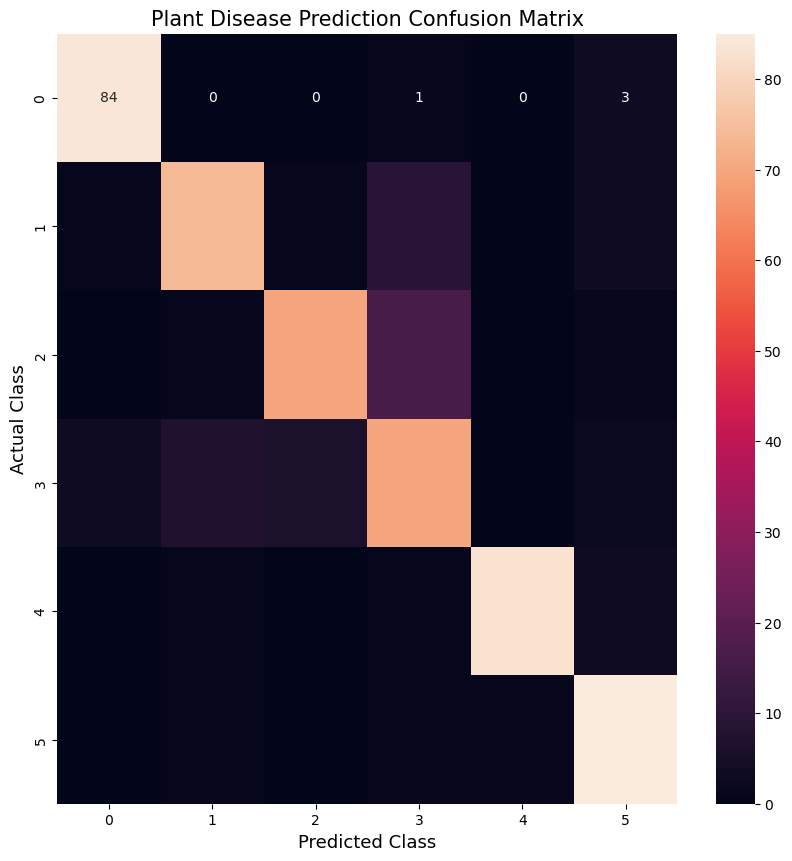

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=13)
plt.ylabel("Actual Class",fontsize=13)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=15)
plt.show()